In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as fits
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [14]:
#cosmosis covariance, assuming fsky 0.05 throughout
filename = "../6x2pt_Roman_SO_camb_gaussian.fits"
hdul = fits.open(filename)
print(hdul.info())
cov = hdul[1].data
cov_log = np.log10(cov)

Filename: ../6x2pt_Roman_SO_camb_gaussian.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


<ipython-input-14-72e957caebd3>:6: RuntimeWarning: divide by zero encountered in log10
  cov_log = np.log10(cov)
<ipython-input-14-72e957caebd3>:6: RuntimeWarning: invalid value encountered in log10
  cov_log = np.log10(cov)


<ipython-input-15-0a0bdff5c08f>:4: UserWarning: Attempting to set identical left == right == 5e-324 results in singular transformations; automatically expanding.
  plt.colorbar()
<ipython-input-15-0a0bdff5c08f>:4: UserWarning: Attempting to set identical bottom == top == 5e-324 results in singular transformations; automatically expanding.
  plt.colorbar()


Text(0.5, 1.0, 'cosmosis')

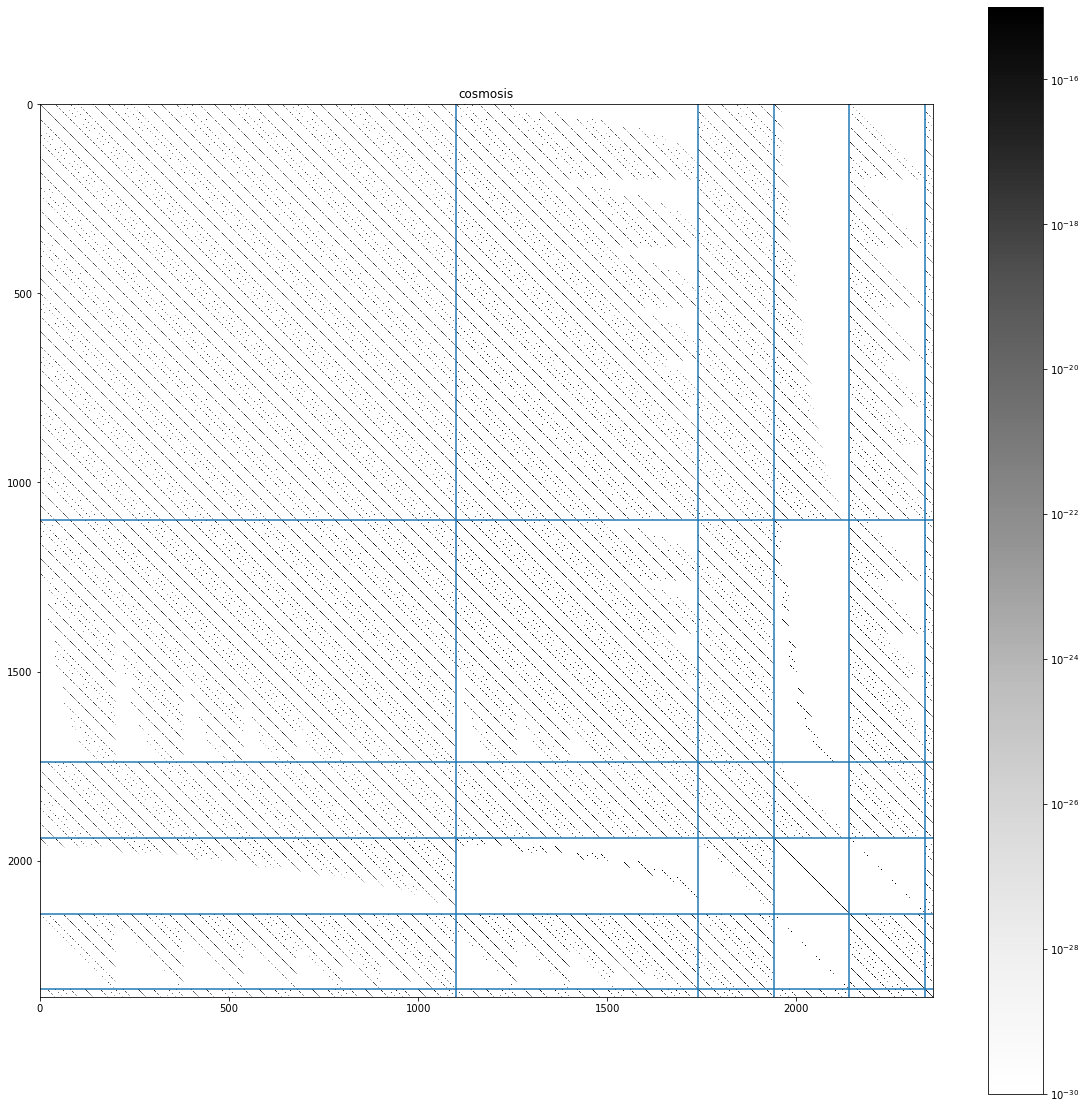

In [15]:
import matplotlib as mpl
plt.figure(figsize=(20,20))
plt.imshow(cov, interpolation='nearest', cmap="Greys",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-30,1e-15)
plt.title("cosmosis")

In [24]:
a = np.zeros((cov.shape[0], cov.shape[0]), float)
np.fill_diagonal(a, 1e-22)

np.linalg.cholesky(cov+a)

LinAlgError: Matrix is not positive definite

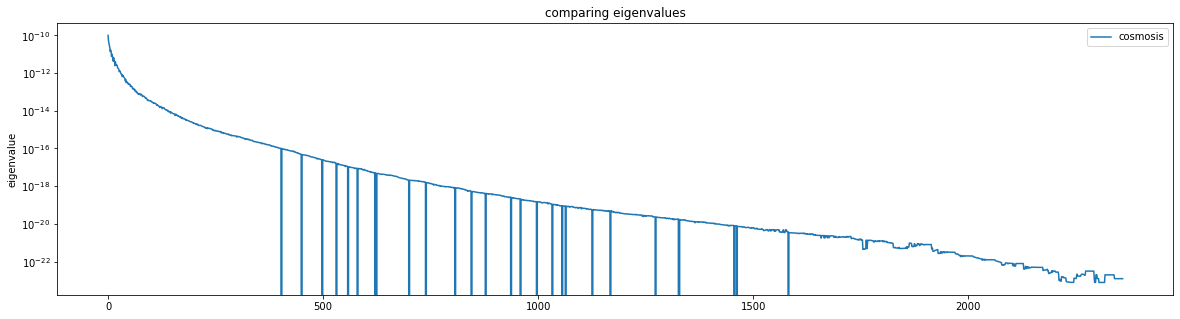

In [17]:
eigenvalues, _ = np.linalg.eig(cov)

plt.figure(figsize=(20,5))
plt.title("comparing eigenvalues")
#plt.plot(range(len(eigenvalues_cosmolike_nearest)), eigenvalues_cosmolike_nearest, label="cosmolike nearest")
#plt.plot(range(len(eigenvalues_cosmolike_notpositivedefinite)), eigenvalues_cosmolike_notpositivedefinite, label="cosmolike notpositivedefinite")
plt.plot(range(len(eigenvalues)), eigenvalues, label="cosmosis")
plt.legend()
plt.ylabel("eigenvalue")
plt.yscale("log")

In [20]:
#cosmosis covariance, assuming fsky 0.05 throughout
filename = "../6x2pt_WFIRST_SO_gaussian_more_ell.fits"
hdul = fits.open(filename)
print(hdul.info())
cov_more_ell = hdul[1].data
cov_log_more_ell = np.log10(cov_more_ell)

Filename: ../6x2pt_WFIRST_SO_gaussian_more_ell.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [4]:

filename = "../6x2pt_Roman_SO_g_cosmolike.fits"
hdul = fits.open(filename)
print(hdul.info())
cov_cosmolike = hdul[1].data
cov_log_cosmolike = np.log10(cov_cosmolike)

Filename: ../6x2pt_Roman_SO_g_cosmolike.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


<ipython-input-4-bca17de1c63e>:5: RuntimeWarning: divide by zero encountered in log10
  cov_log_cosmolike = np.log10(cov_cosmolike)


In [31]:

filename = "../6x2pt_WFIRST_SO.fits"
hdul = fits.open(filename)
print(hdul.info())
cov_cosmolike_ng = hdul[1].data
cov_log_cosmolike_ng = np.log10(cov_cosmolike_ng)

Filename: ../6x2pt_WFIRST_SO.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


NameError: name 'cov_cosmolike_ng' is not defined

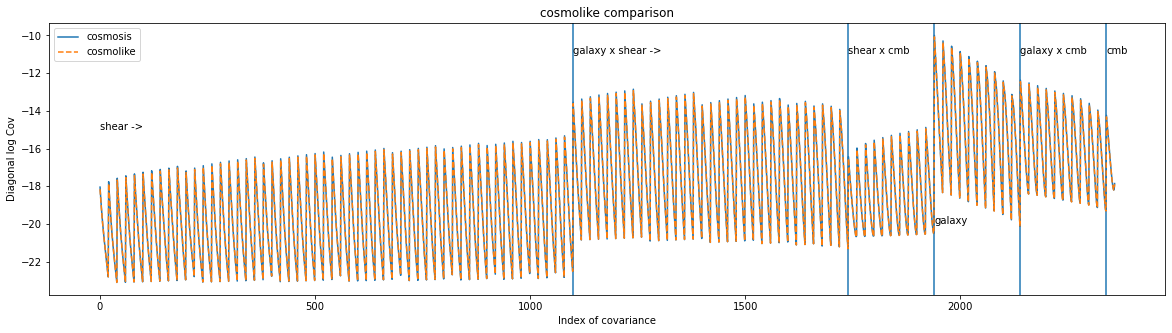

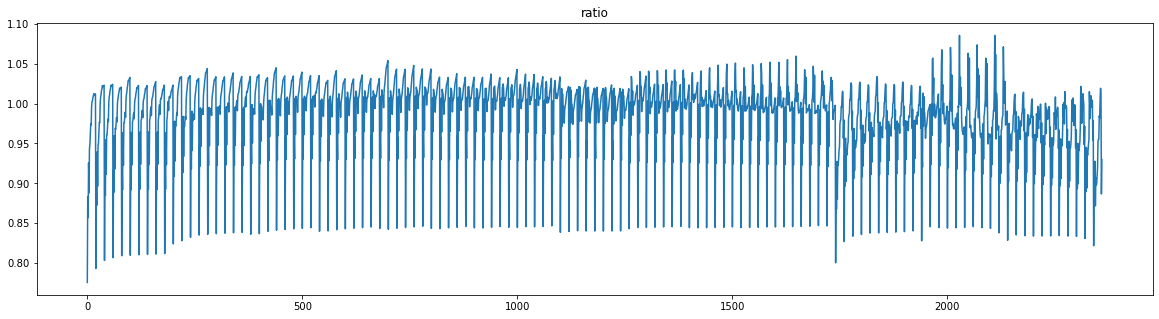

In [5]:
x = np.arange(len(np.diagonal(cov)))
plt.figure(figsize=(20,5))
plt.title("cosmolike comparison")
plt.plot(x, np.diagonal(cov_log), label="cosmosis")


plt.text(0, -15, "shear ->")
plt.axvline(x=1100)
plt.text(1100, -11, "galaxy x shear ->")
plt.axvline(x=1740)
plt.text(1740, -11, "shear x cmb")
plt.axvline(x=1940)
plt.text(1940, -20, "galaxy")
plt.axvline(x=2140)
plt.text(2140, -11, "galaxy x cmb")
plt.axvline(x=2340)
plt.text(2340, -11, "cmb")


plt.plot(x, np.diagonal(cov_log_cosmolike), "--",label="cosmolike")
# plt.plot(x, np.diagonal(cov_log), "--",label="all 0.05")
# plt.plot(x, np.diagonal(cov_log_cmb0_4), "--",label="cmb 0.4, rest 0.05")

plt.legend()
plt.ylabel("Diagonal log Cov")
plt.xlabel("Index of covariance")

plt.figure(figsize=(20,5))
plt.title("ratio")
plt.plot(x,np.diagonal(cov_cosmolike)/np.diagonal(cov) );
plt.plot(x,np.diagonal(cov_cosmolike_ng)/np.diagonal(cov) );

plt.plot(x,np.diagonal(cov_more_ell)/np.diagonal(cov) );
plt.text(0, 1.3, "shear ->")
plt.axvline(x=1100)
plt.text(1100, 1.3, "galaxy x shear ->")
plt.axvline(x=1740)
plt.text(1740, 1.3, "shear x cmb")
plt.axvline(x=1940)
plt.text(1940, 1.3, "galaxy")
plt.axvline(x=2140)
plt.text(2140, 1.3, "galaxy x cmb")
plt.axvline(x=2340)
plt.text(2340, 1.3, "cmb")


plt.figure(figsize=(20,5))
plt.title("ratio")
plt.plot(x,np.diagonal(cov_cosmolike_ng)/np.diagonal(cov_cosmolike) );

plt.text(0, 1.3, "shear ->")
plt.axvline(x=1100)
plt.text(1100, 1.3, "galaxy x shear ->")
plt.axvline(x=1740)
plt.text(1740, 1.3, "shear x cmb")
plt.axvline(x=1940)
plt.text(1940, 1.3, "galaxy")
plt.axvline(x=2140)
plt.text(2140, 1.3, "galaxy x cmb")
plt.axvline(x=2340)
plt.text(2340, 1.3, "cmb")

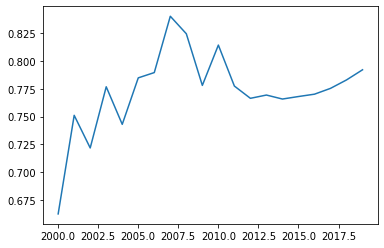

In [28]:
plt.plot(x[2000:2020],(np.diagonal(cov_cosmolike)/np.diagonal(cov))[2000:2020] );

In [6]:
cov
#7.44171641e-19, 0.00000000e+00],
  #     [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
  #      0.00000000e+00, 0.00000000e+00, 1.39137648e-18]
  #this is the one I have been using!!

array([[6.05959379e-19, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.48814243e-19, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.24480062e-19, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.15949429e-19, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44171641e-19, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.39137648e-18]])

In [22]:
#cosmosis covariance, assuming fsky 0.05 throughout
filename = "6x2pt_WFIRST_SO_gaussian_fskycmb0_4.fits"

hdul = fits.open(filename)
print(hdul.info())
cov_cmb0_4 = hdul[1].data
cov_log_cmb0_4 = np.log10(cov_cmb0_4)

Filename: 6x2pt_WFIRST_SO_gaussian_fskycmb0_4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [23]:
#cosmosis covariance, assuming fsky 0.05 throughout
filename = "6x2pt_WFIRST_SO_gaussian_fsky0_4.fits"

hdul = fits.open(filename)
print(hdul.info())
cov_all0_4 = hdul[1].data
cov_log_all0_4 = np.log10(cov_all0_4)

Filename: 6x2pt_WFIRST_SO_gaussian_fsky0_4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


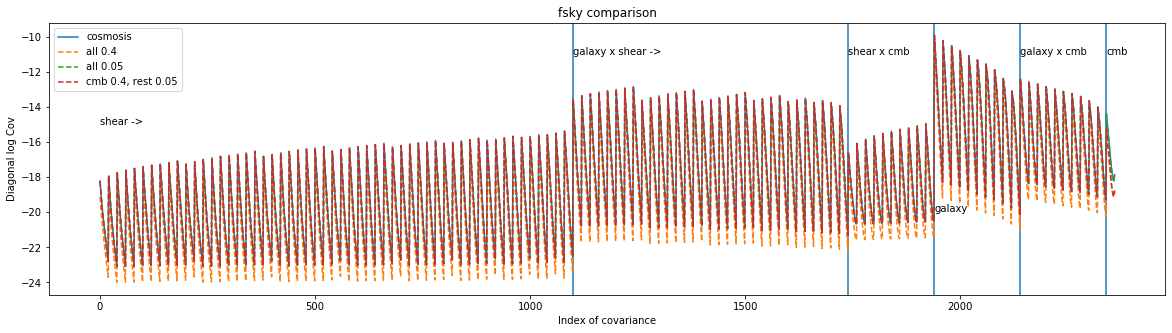

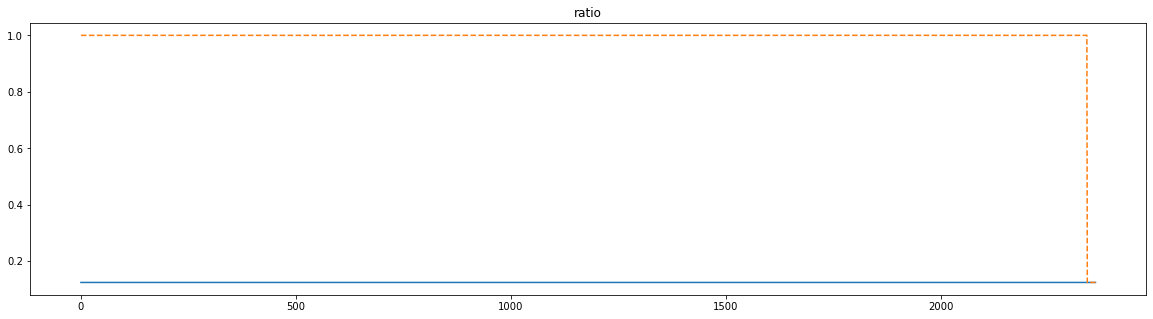

In [24]:
x = np.arange(len(np.diagonal(cov)))
plt.figure(figsize=(20,5))
plt.title("fsky comparison")
plt.plot(x, np.diagonal(cov_log), label="cosmosis")


plt.text(0, -15, "shear ->")
plt.axvline(x=1100)
plt.text(1100, -11, "galaxy x shear ->")
plt.axvline(x=1740)
plt.text(1740, -11, "shear x cmb")
plt.axvline(x=1940)
plt.text(1940, -20, "galaxy")
plt.axvline(x=2140)
plt.text(2140, -11, "galaxy x cmb")
plt.axvline(x=2340)
plt.text(2340, -11, "cmb")


plt.plot(x, np.diagonal(cov_log_all0_4), "--",label="all 0.4")
plt.plot(x, np.diagonal(cov_log), "--",label="all 0.05")
plt.plot(x, np.diagonal(cov_log_cmb0_4), "--",label="cmb 0.4, rest 0.05")

plt.legend()
plt.ylabel("Diagonal log Cov")
plt.xlabel("Index of covariance")

plt.figure(figsize=(20,5))
plt.title("ratio")
plt.plot(x,np.diagonal(cov_all0_4)/np.diagonal(cov) );
plt.plot(x,np.diagonal(cov_cmb0_4)/np.diagonal(cov) , "--");

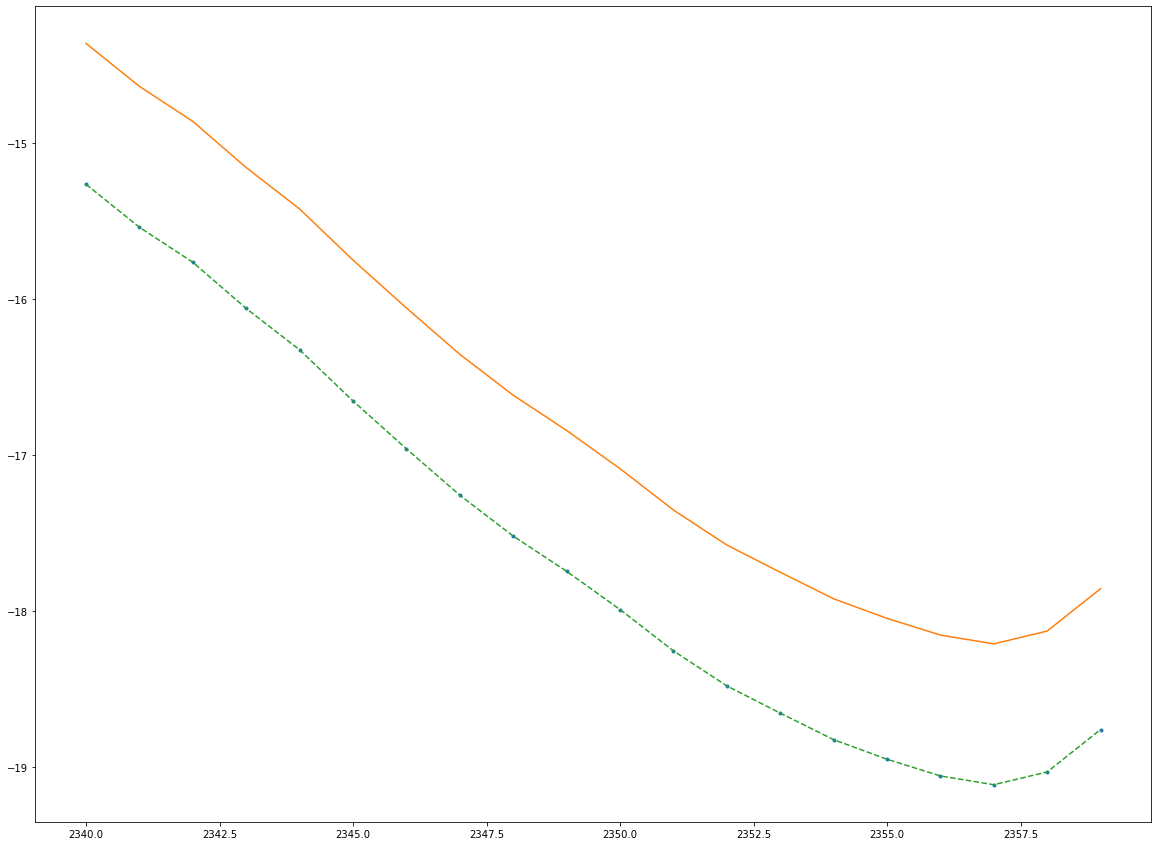

In [25]:
plt.figure(figsize=(20,15))
plt.plot(x[-20:], np.diagonal(cov_log_all0_4)[-20:], ".",label="all 0.4")
plt.plot(x[-20:], np.diagonal(cov_log)[-20:],label="all 0.05")
plt.plot(x[-20:], np.diagonal(cov_log_cmb0_4)[-20:], "--",label="cmb 0.4, rest 0.05")

In [26]:
np.linalg.cholesky(cov)

array([[7.78433927e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.98812834e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.52817321e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.71658688e-10, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.55538580e-10, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17566018e-09]])

In [29]:
np.linalg.cholesky(cov[:-20,:-20])

array([[ 7.78433927e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.98812834e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.52817321e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.96625157e-10,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  2.40847180e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.24633670e-10]])

In [94]:
print(cov)
covTEST = cov.copy()

[[6.05959379e-19 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.48814243e-19 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24480062e-19 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.15949429e-19
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.44171641e-19 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.39137648e-18]]


In [95]:
covTEST[-20:,-20:] = covTEST[-20:,-20:]*0.05/0.4 #scaling 
covTEST

array([[6.05959379e-19, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.48814243e-19, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.24480062e-19, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.69936786e-20, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.30214551e-20, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.73922061e-19]])

In [96]:
np.linalg.cholesky(covTEST)

LinAlgError: Matrix is not positive definite

In [99]:
covTEST2 = cov.copy()
covTEST2[-20:,:] = covTEST2[-20:,:]*np.sqrt(0.05/0.4) #scaling 
covTEST2[:,-20:] = covTEST2[:,-20:]*np.sqrt(0.05/0.4) #scaling 
print(covTEST2)
np.linalg.cholesky(covTEST2)

[[6.05959379e-19 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.48814243e-19 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24480062e-19 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.69936786e-20
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.30214551e-20 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.73922061e-19]]


array([[7.78433927e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.98812834e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.52817321e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.72822545e-10, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.02478566e-10, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.15658643e-10]])

In [27]:
np.linalg.cholesky(cov_all0_4)

array([[2.75217954e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.76356969e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.24739760e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.72822545e-10, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.02478566e-10, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.15658643e-10]])

In [28]:
np.linalg.cholesky(cov_cmb0_4)

LinAlgError: Matrix is not positive definite

In [30]:
np.linalg.cholesky(cov_cmb0_4[:-20,:-20])

array([[ 7.78433927e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.98812834e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.52817321e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.96625157e-10,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  2.40847180e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.24633670e-10]])

In [41]:
#lets have a quick look if that is the problem with the cosmolike approach:
filename = "6x2pt_WFIRST_SO_notpositivedefinite.fits"

hdul_cosmolike = fits.open(filename)
print(hdul_cosmolike.info())
cosmolike = hdul_cosmolike[1].data
cosmolike_log = np.log10(cosmolike_nearest)

Filename: 6x2pt_WFIRST_SO_notpositivedefinite.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [42]:
np.linalg.cholesky(cosmolike)

LinAlgError: Matrix is not positive definite

In [43]:
np.linalg.cholesky(cosmolike[:-20,:-20])

LinAlgError: Matrix is not positive definite

In [44]:
np.linalg.cholesky(cosmolike[:-20,:-20])


LinAlgError: Matrix is not positive definite

In [46]:
np.linalg.cholesky(cosmolike[-20:,-20:]);

In [47]:
np.linalg.cholesky(cosmolike[-200:,-200:])

array([[5.02511210e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.71815201e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.63592493e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.86653876e-10, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.10453021e-10, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.13627835e-09]])

In [62]:
np.linalg.cholesky(cosmolike[-1272:,-1272:])

array([[ 6.32183796e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.76381683e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.25080230e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.84742305e-10,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  8.09376263e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.13568624e-09]])

In [63]:
np.linalg.cholesky(cosmolike[-1273:,-1273:])

LinAlgError: Matrix is not positive definite

In [64]:
np.linalg.cholesky(cosmolike[:-1273,:-1273])

array([[ 8.37512499e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.62417216e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.82575834e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.98852658e-10,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  2.99709949e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.22367354e-10]])

In [81]:
np.linalg.cholesky(cosmolike[:-760,:-760])


array([[8.37512499e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.62417216e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.82575834e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.09877877e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.25261470e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.97901248e-11]])

In [82]:
np.linalg.cholesky(cosmolike[:-759,:-759])

LinAlgError: Matrix is not positive definite

In [83]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2360                                                  
NAXIS2  =                 2360                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COVDATA =                    T                                                  
EXTNAME = 'COVMAT  '                                                            
STRT_0  =                    0                                                  
NAME_0  = 'shear_cl'                                                            
STRT_1  =                 1100                                                  
NAME_1  = 'galaxy_shear_cl' 